# Lab experiment
### You are a scientist who is working at Copenhagen University. Your research project is about identifying gases that reduce the global warming potential of greenhouse gases. In your most recent experiment you mixed two different gases. The chemical reaction made the temperature in the reaction tube vary over time, which was measured with 3 different thermometers. You're now back in your office and ready to analyse your data, which is available in a csv file

### The exercise might seem like a lot, but don't worry. Most of the visualisation questions were already solved during the exercises session or you can find help in the lecture notebook. If you don't understand some questions or need help, please ask for help in the Slack channel or ping one of the teachers directly.

### Hint: it might be a good idea to label each figure according to the equastions that you're solving. For example, a reasonable name for the figure in question c) could be figc. 

#### a) Import the dataset into a pandas DataFrame. Convert the time column into a pandas.Timestamp object. 

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"]  = (9, 6)

df = pd.read_csv("data/temperature_signals.csv")
# here you assume that the timestamps follow the specified format 
df["time"] = pd.to_datetime(df["time"], format="%Y-%m-%d %H:%M:%S")  

#### b) Inspect the dataset. Are there any missing values? If yes, how many are missing? Can you say anything more about the missing values?

In [20]:
# quick way to check for missing values. you won't be able to say much more than 
# that most missing values occur in the temp3 column. 
df.isna().sum()

time       0
temp1     50
temp2     56
temp3    151
dtype: int64

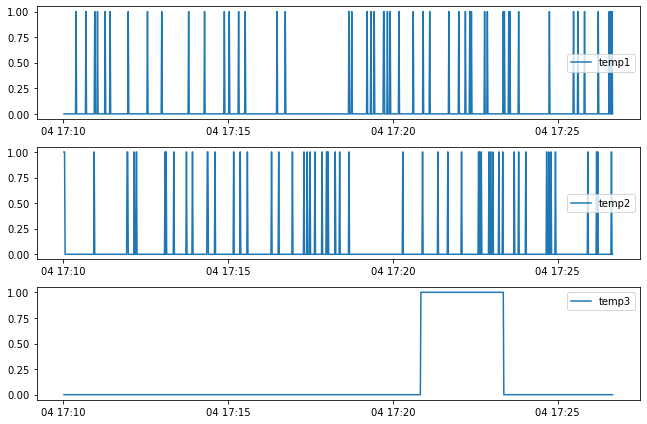

In [28]:
# since you're working with time series data you can also visualize when the data is missing
signal_cols = ["temp1", "temp2", "temp3"]
fig, ax = plt.subplots(nrows=len(signal_cols))
for i, col in enumerate(signal_cols):
    ax[i].plot(df["time"], df[col].isna(), label=col)
    ax[i].legend()
plt.tight_layout()

Now you see that the data seems to be missing at random times for temp1 and temp2 (it's difficult to spot any pattern). The data is missing for a consecutive amount of time for temp3. 

#### c) Now visualise each of the 3 temperature signals.
- First, you want to create a figure with 3 different axes instances, one axis instance for each temperature signal
- Then you visualize each signal. Do you use a scatter or line plot? Try to justify your choice with a couple of words
- Because you want to discuss your experiment with your colleagues, you also want to make the figure pretty. Label each of the axes with information that you consider important

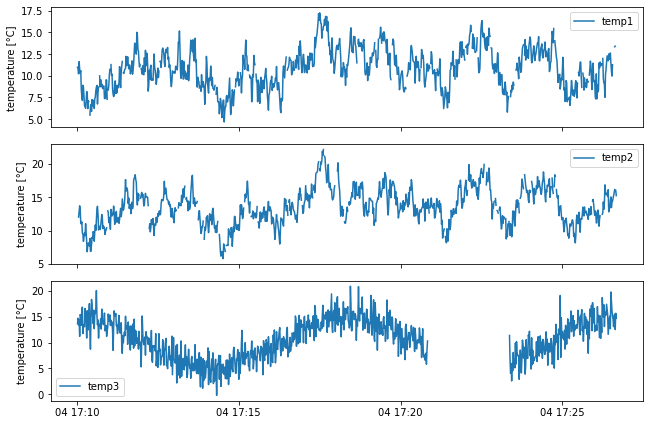

In [31]:
fig, ax = plt.subplots(nrows=3, sharex=True)  # 3 different axes instances

for i, col in enumerate([f"temp{i}" for i in [1,2,3]]):
    ax[i].plot(df["time"], df[col], label=col)
    ax[i].set_ylabel("temperature [°C]")
    ax[i].legend()
plt.tight_layout()

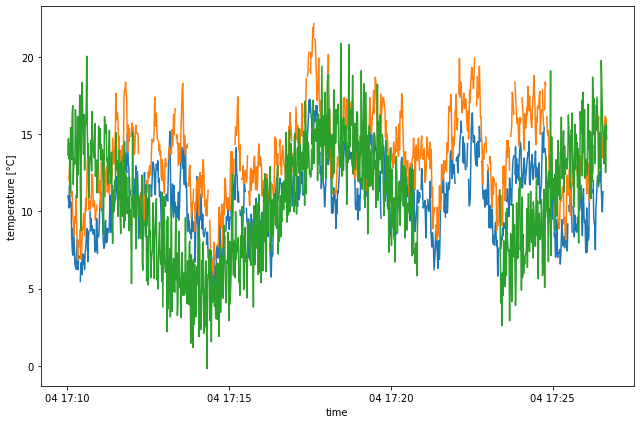

In [32]:
fig, ax = plt.subplots()  # 1 axis instance
for col in [f"temp{i}" for i in [1,2,3]]:
    ax.plot(df["time"], df[col])

ax.set_ylabel("temperature [°C]")
ax.set_xlabel("time")
plt.tight_layout()

#### d) Explain in your own words how the data looks like. Don't be too specific, try to "explain" the big picture in 2-3 sentences. HINT: don't focus only on the missing data

- the signal of temp1 and temp2 seem to follow each other (when temp1 increase, so does temp2. When temp1 decreases, so does temp2). Thus, there seems to be same relationship between both variables
- temp3 experiences some seasonality (reoccuring pattern) and seems to be unrelated with temp1 and temp2

#### e) Now create one figure with one axis element to visualise the temperature of signal 1 and 2 in one coordinate system. Don't forget to label your x- and y-axis

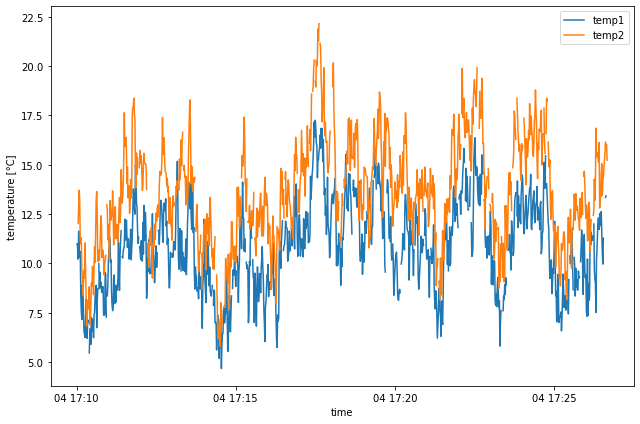

In [35]:
fig, ax = plt.subplots()
ax.plot(df["time"], df["temp1"], label="temp1")
ax.plot(df["time"], df["temp2"], label="temp2")
ax.set_ylabel("temperature [°C]")
ax.set_xlabel("time")
ax.legend()
plt.tight_layout()

#### g) Create another figure to use a scatter plot to visualize temperature signal 1 and 2

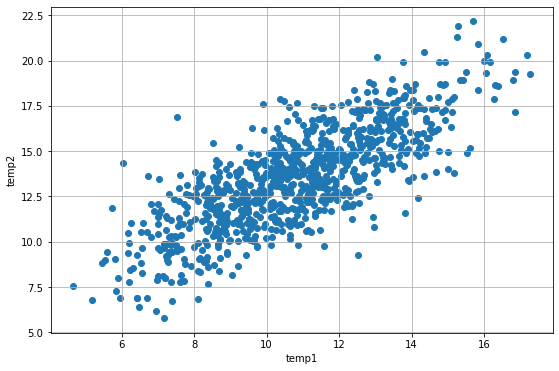

In [37]:
fig, ax = plt.subplots()
ax.scatter(df["temp1"], df["temp2"])
ax.set_xlabel("temp1")
ax.set_ylabel("temp2")
ax.grid(which="both")

#### h) There seems to be a pattern. Try to describe it in 1-2 sentences

The scatter plot delivers stronger evidence that the two signals are positively correlated (when temp1 increases, temp2 also increases)

#### i) What do you see if you plot the temperature of signal 1 against the temperature of signal 3. Use again a scatter plot and try to describe what you see

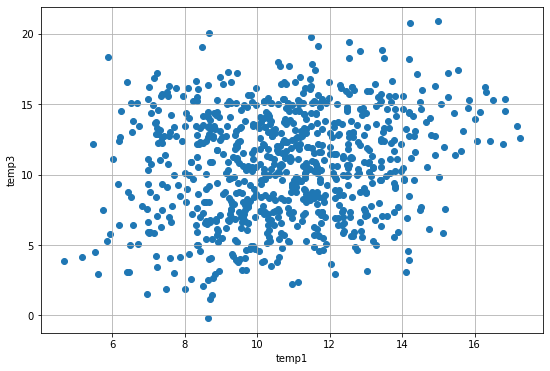

In [38]:
fig, ax = plt.subplots()
ax.scatter(df["temp1"], df["temp3"])
ax.set_xlabel("temp1")
ax.set_ylabel("temp3")
ax.grid(which="both")

There seems to be no visible correlation between both signals

#### k) Visualize temperature signal 3 in a figure. Can you guess how the data was generated? Hint: have a look at https://mathworld.wolfram.com/Cosine.html 

Text(0.5, 0, 'time')

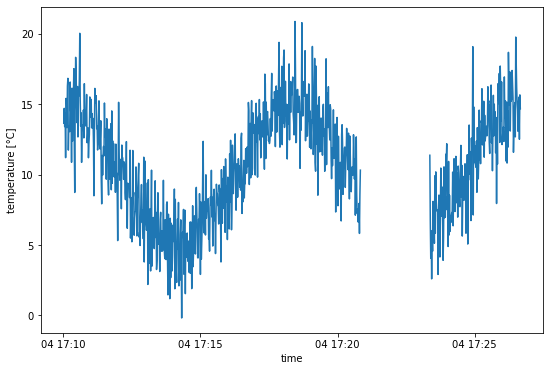

In [40]:
fig, ax = plt.subplots()
ax.plot(df["time"], df["temp3"])
ax.set_ylabel("temperature [°C]")
ax.set_xlabel("time")

The signal is generated by a cosine function. You can guess it by realising that the signal is periodic and completes 2 full cycles during the recorded time interval. 

#### l) To make the guessing easier, you try to visualize the temperature signal 3 and your guess in the same figure
Hints: 
- Use np.cos and/or np.sin and guess the intercept, amplitude and period 
- you must create a numpy.ndarray with exactly the same length as the dataframe of your experimental data  
- be careful when you used the time column for the values on the x-axis. It could be a good idea to create a new pandas.DataFrame with the time column and your guess signal 

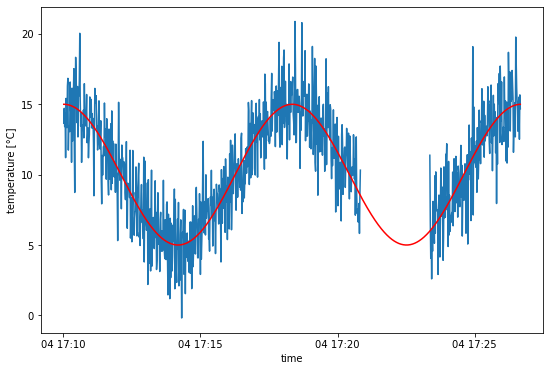

In [43]:
fig, ax = plt.subplots()
ax.plot(df["time"], df["temp3"])
ax.set_ylabel("temperature [°C]")
ax.set_xlabel("time")

x = np.arange(len(df))  # generate a sequence from 0 to N - 1, where N is the length of the dataset
intercept, amplitude, period = 10, 5, 500 # these are the correct values of the signal.
# you could guess them more or less accurately by playing around (increasing/decreasing) 
# each value and realise how the red curve changes
cos_series = intercept + amplitude * np.cos(2 * np.pi * x / period) 
ax.plot(df["time"], cos_series, label="true signal", c="red")

#### l) Next week you'll have a meeting with the laboratory supervisor. You're not happy that your dataset contains some missing values. You think that it could be related sensor malfunction. Because you know that the laboratory supervisor doesn't like plain numbers, you try to come up with a nice visualisation that shows the percentage of missing values for each of the 3 temperature signals. If you need some inspiration have a look at https://matplotlib.org/stable/gallery/index.html

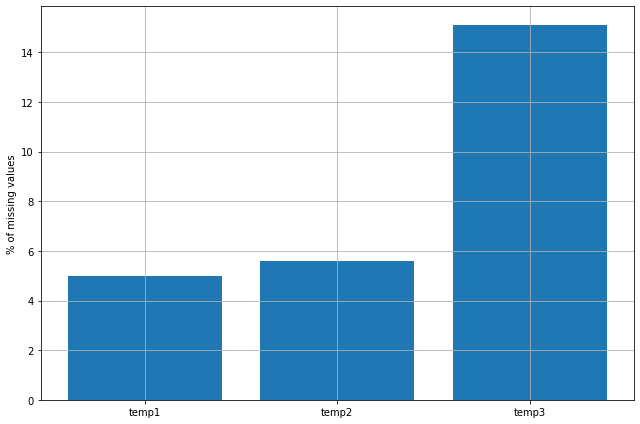

In [54]:
is_na = 100 * df.isna().sum() / len(df)  # times 100 to obtain percent
fig, ax = plt.subplots()
col = [f"temp{i}" for i in [1,2,3]]
ax.bar(col, is_na[col])
ax.set_ylabel("% of missing values")
ax.grid(which="both")
plt.tight_layout()

#### m) The laboratory supervisor doesn't like looking at plots in jupyter notebooks. To improve the likelihood that she'll have a look to see if there's something wrong with the temperature sensors you'll plan to create a nice slide deck. For that you need to export your visualisation (figure) as a png/pdf file. Hint: have a look at https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html and save your figure as a png or pdf file. Make sure that you specify the path correctly and check if you're able to open the created file. Does the visualisation look good?

In [ ]:
fig.savefig("nice_barplot.png")

#### Bonus question: what would you do about the missing values of temperature signal 3? Are there any reasonable approaches to fill in values for missing timestamps? 

As discussed during class, there isn't much you can do about it because the values are missing for a relatively long period (this prohibits you from using the last observed value to replace missing values). The only meaningful thing to do is to understand why the data isn't recorded (that is, you should talk to the laboratory supervisor)